#  Group 12 PDS Final Project

<div class="alert alert-warning"> This is a work in progress  </div>

### Note for group 12: Import any necessary libraries here

In [28]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import re 
import numpy as np


#There IS an easier way to do this, just not one that i got to run for some reason. 

your_dir = os.getcwd()          # For the sake of getting the path for each group member, its dynamic
datasets = os.path.join(your_dir, "Datasets") # Originally i made it by conjoining a string. Using OS made it work across devices as some have different notation

datasets


'c:\\Users\\ochix\\Desktop\\MSc BA Esade\\Term 1\\Python for Data Science\\Final Project\\Datasets'

## Pre-Processing of the Dataset

First we look if the datasets have missing values in order to impute if needed. 

In [29]:
# We list the file names
file_names = ["BRK-A.csv", "DNUT.csv", "DPZ.csv", "LKNCY.csv", "MCD.csv",
              "PZZA.csv", "QSR.csv", "SBUX.csv", "WEN.csv", "YUM.csv"]

directory = r"Datasets"

for file_name in file_names:
    file_path = os.path.join(directory, file_name)
    df = pd.read_csv(file_path)
    
    print(f"Checking {file_name} for missing values:")
    missing_values = df.isnull().sum()
    print(missing_values)
   


Checking BRK-A.csv for missing values:
Date           0
Open         541
High         546
Low          543
Close        549
Adj Close    547
Volume       561
dtype: int64
Checking DNUT.csv for missing values:
Date          0
Open         40
High         40
Low          40
Close        39
Adj Close    40
Volume       40
dtype: int64
Checking DPZ.csv for missing values:
Date           0
Open         250
High         248
Low          245
Close        245
Adj Close    247
Volume       254
dtype: int64
Checking LKNCY.csv for missing values:
Date          0
Open         66
High         66
Low          65
Close        66
Adj Close    67
Volume       67
dtype: int64
Checking MCD.csv for missing values:
Date           0
Open         724
High         713
Low          714
Close        721
Adj Close    708
Volume       734
dtype: int64
Checking PZZA.csv for missing values:
Date           0
Open         390
High         379
Low          381
Close        386
Adj Close    379
Volume       394
dtype: 

Since we have many missing values, we are going to create a dictionary to store each dataset into a dataframe for further analysis and processing. Also we are imputing these missing values using linear interpolation, which estimates missing values based on the surrounding data points, potentially providing more accurate and realistic imputed values, especially for financial time series data like stock prices.

In [30]:
# We define the variables to be imputed
variables = ["Open", "High", "Low", "Close", "Adj Close", "Volume"]

# Create a dictionary to store the dataframes
dataframes = {}

for file_name in file_names:
    file_path = os.path.join(directory, file_name)
    df = pd.read_csv(file_path)
    
    # We make sure the dataframe is sorted by the "Date" column
    df['Date'] = pd.to_datetime(df['Date'])  # We convert the "Date" column to datetime
    df = df.sort_values(by='Date')
    
    # Here we use linear interpolation to impute missing values in each column
    for col in variables:
        df[col] = df[col].interpolate(method="linear", limit_direction="both")
    
    df = df.round(2)  # We do this so as to not have too many decimals
    
    # Store the dataframe in the dictionary
    dataframes[file_name] = df
    
    # Display the results of the imputations
    print(f"Data for {file_name}:")
    print(df.head(5), "\n")

Data for BRK-A.csv:
        Date   Open   High    Low       Close  Adj Close   Volume
0 1980-03-17  290.0  310.0  290.0  1198073.65      290.0  10000.0
1 1980-03-18  290.0  290.0  290.0      290.00      290.0      0.0
2 1980-03-19  290.0  310.0  290.0      290.00      290.0  20000.0
3 1980-03-20  290.0  290.0  290.0      290.00      290.0      0.0
4 1980-03-21  290.0  290.0  290.0      290.00      290.0      0.0 

Data for DNUT.csv:
        Date   Open   High    Low  Close  Adj Close      Volume
0 2021-07-01  16.30  21.69  15.50  21.00      20.36  40888200.0
1 2021-07-02  19.85  20.45  18.32  19.12      18.54   8631400.0
2 2021-07-06  18.90  19.31  17.00  17.00      16.48   3973000.0
3 2021-07-07  17.29  18.16  17.00  17.78      17.24   3213500.0
4 2021-07-08  17.25  18.35  17.00  18.20      17.65   5448300.0 

Data for DPZ.csv:
        Date   Open   High    Low  Close  Adj Close      Volume
0 2004-07-13  14.00  14.10  13.49  13.50       6.14  14964100.0
1 2004-07-14  13.50  13.55  12.

In [31]:
# Finally we check the missing values in each dataframe in the dictionary
for file_name, df in dataframes.items():
    missing_values_count = df.isnull().sum().sum()
    print(f"Number of missing values in {file_name} after imputations: {missing_values_count}")


Number of missing values in BRK-A.csv after imputations: 0
Number of missing values in DNUT.csv after imputations: 0
Number of missing values in DPZ.csv after imputations: 0
Number of missing values in LKNCY.csv after imputations: 0
Number of missing values in MCD.csv after imputations: 0
Number of missing values in PZZA.csv after imputations: 0
Number of missing values in QSR.csv after imputations: 0
Number of missing values in SBUX.csv after imputations: 0
Number of missing values in WEN.csv after imputations: 0
Number of missing values in YUM.csv after imputations: 0


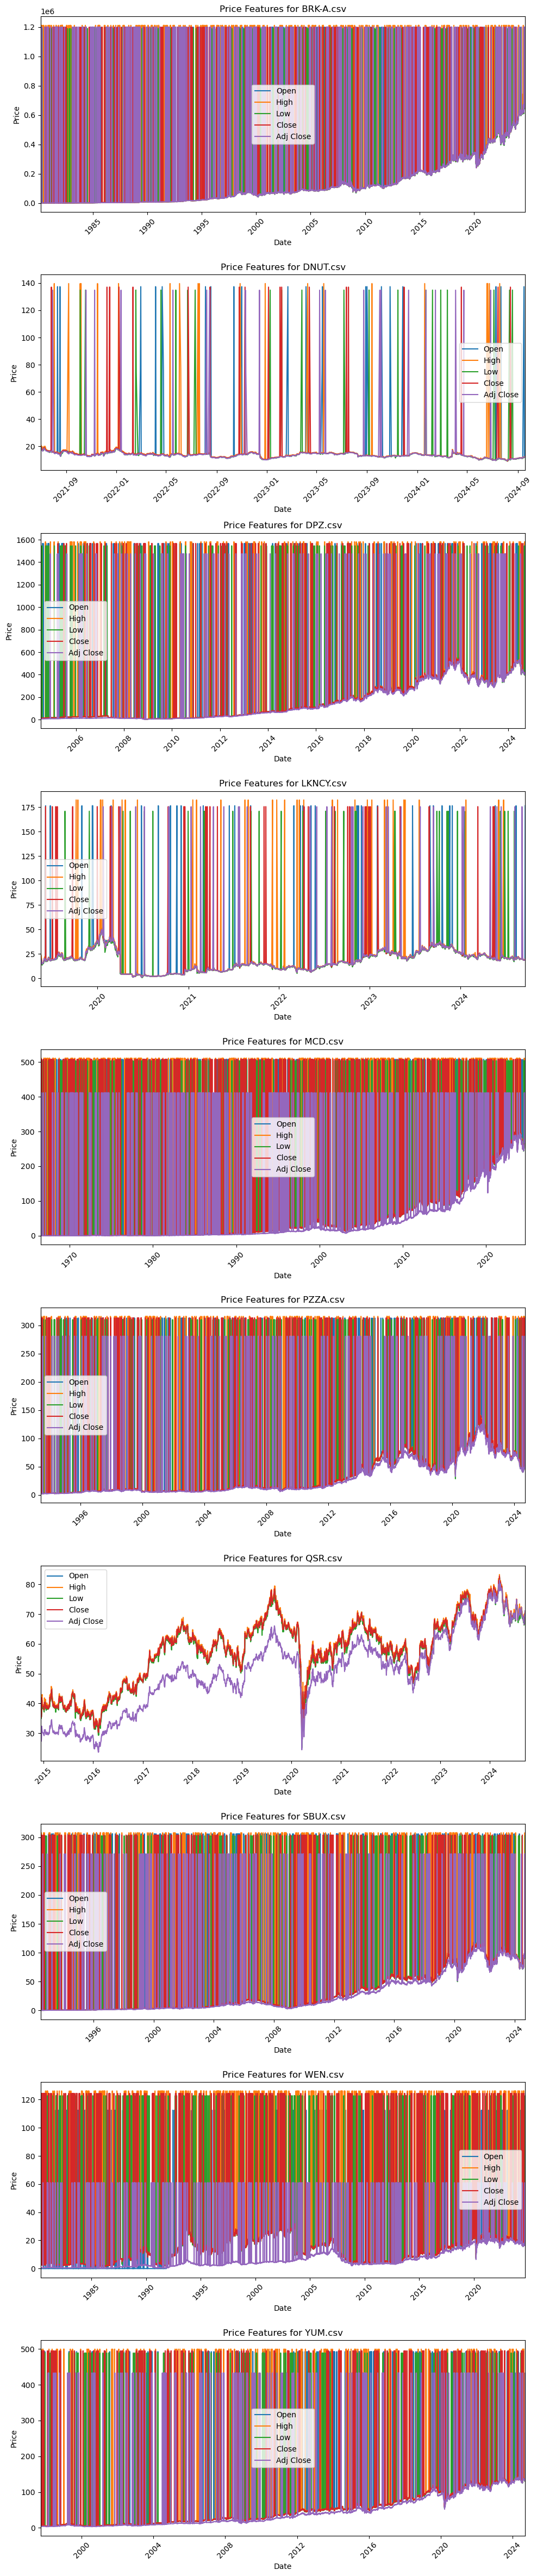

In [32]:
# Define the variables to be plotted (excluding Volume)
variables = ["Open", "High", "Low", "Close", "Adj Close"]

def plot_all_datasets_vertically(dataframes, variables):
    # Set up the plot
    fig, axs = plt.subplots(len(dataframes), 1, figsize=(10, 5 * len(dataframes)), sharex=False)

    # Ensure to use consistent colors for each feature across all plots
    colors = plt.get_cmap('tab10')

    # Iterate through each dataframe and plot the price features
    for idx, (file_name, df) in enumerate(dataframes.items()):
        ax = axs[idx]
        for i, var in enumerate(variables):
            ax.plot(df['Date'], df[var], label=var, color=colors(i))
        ax.set_title(f'Price Features for {file_name}')
        ax.set_xlabel('Date')
        ax.set_ylabel('Price')
        ax.legend()
        ax.tick_params(axis='x', rotation=45)
        ax.set_xlim([df['Date'].min(), df['Date'].max()])

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

# Example usage
plot_all_datasets_vertically(dataframes, variables)


## Remove Outliers
By quickly looking at the values, it's evident that numerous outliers are present in the dataset. These anomalies could significantly skew our forthcoming analyses and visualizations. It’s crucial to address them to ensure the integrity and accuracy of our results. Since "Volume" could change a lot depending on several factor we will not use the outlier removal.

In [33]:
# Define the variables to be imputed, excluding "Volume"
variables = ["Open", "High", "Low", "Close", "Adj Close"]
window_size = 20
mad_threshold = 3.5

# Iterate over each dataframe in the dictionary
for file, data in dataframes.items():
    for col in variables:  # Loop through all the variables

        # Compute the rolling median for the specified column
        rolling_median = data[col].rolling(window=window_size, center=True, min_periods=1).median()

        # Compute the Median Absolute Deviation (MAD) for the specified column within a rolling window
        mad = data[col].rolling(window=window_size, center=True, min_periods=1).apply(
            lambda x: np.median(np.abs(x - np.median(x))), raw=True
        )

        # Define a threshold for detecting outliers by multiplying the MAD by the given threshold multiplier (mad_threshold)
        threshold = mad_threshold * mad

        # Identify outliers based on the threshold
        outliers = (data[col] - rolling_median).abs() > threshold
        
        # Replace outliers with NaN
        data.loc[outliers, col] = np.nan
    
    # Update the dataframe in the dictionary after marking outliers
    dataframes[file] = data

for file, data in dataframes.items():
    for col in variables:
        # Interpolate NaN values linearly
        data[col] = data[col].interpolate(method="linear", limit_direction="both")
    
    # Round numerical values to two decimal places
    data = data.round(2)
    
    # Update the dataframe in the dictionary
    dataframes[file] = data

# Display the results of the imputations
for file_name, df in dataframes.items():
    print(f"Data for {file_name}:")
    print(df.head(5), "\n")


Data for BRK-A.csv:
        Date   Open   High    Low  Close  Adj Close   Volume
0 1980-03-17  290.0  310.0  290.0  290.0      290.0  10000.0
1 1980-03-18  290.0  290.0  290.0  290.0      290.0      0.0
2 1980-03-19  290.0  310.0  290.0  290.0      290.0  20000.0
3 1980-03-20  290.0  290.0  290.0  290.0      290.0      0.0
4 1980-03-21  290.0  290.0  290.0  290.0      290.0      0.0 

Data for DNUT.csv:
        Date   Open   High   Low  Close  Adj Close      Volume
0 2021-07-01  16.30  21.69  17.0  19.12      18.54  40888200.0
1 2021-07-02  17.60  20.45  17.0  19.12      18.54   8631400.0
2 2021-07-06  18.90  19.31  17.0  17.00      16.48   3973000.0
3 2021-07-07  17.29  18.16  17.0  17.78      17.24   3213500.0
4 2021-07-08  17.25  18.35  17.0  18.20      17.65   5448300.0 

Data for DPZ.csv:
        Date   Open   High    Low  Close  Adj Close      Volume
0 2004-07-13  14.00  14.10  13.49  13.50       6.14  14964100.0
1 2004-07-14  13.50  13.55  12.91  13.44       6.12   2801000.0
2 2

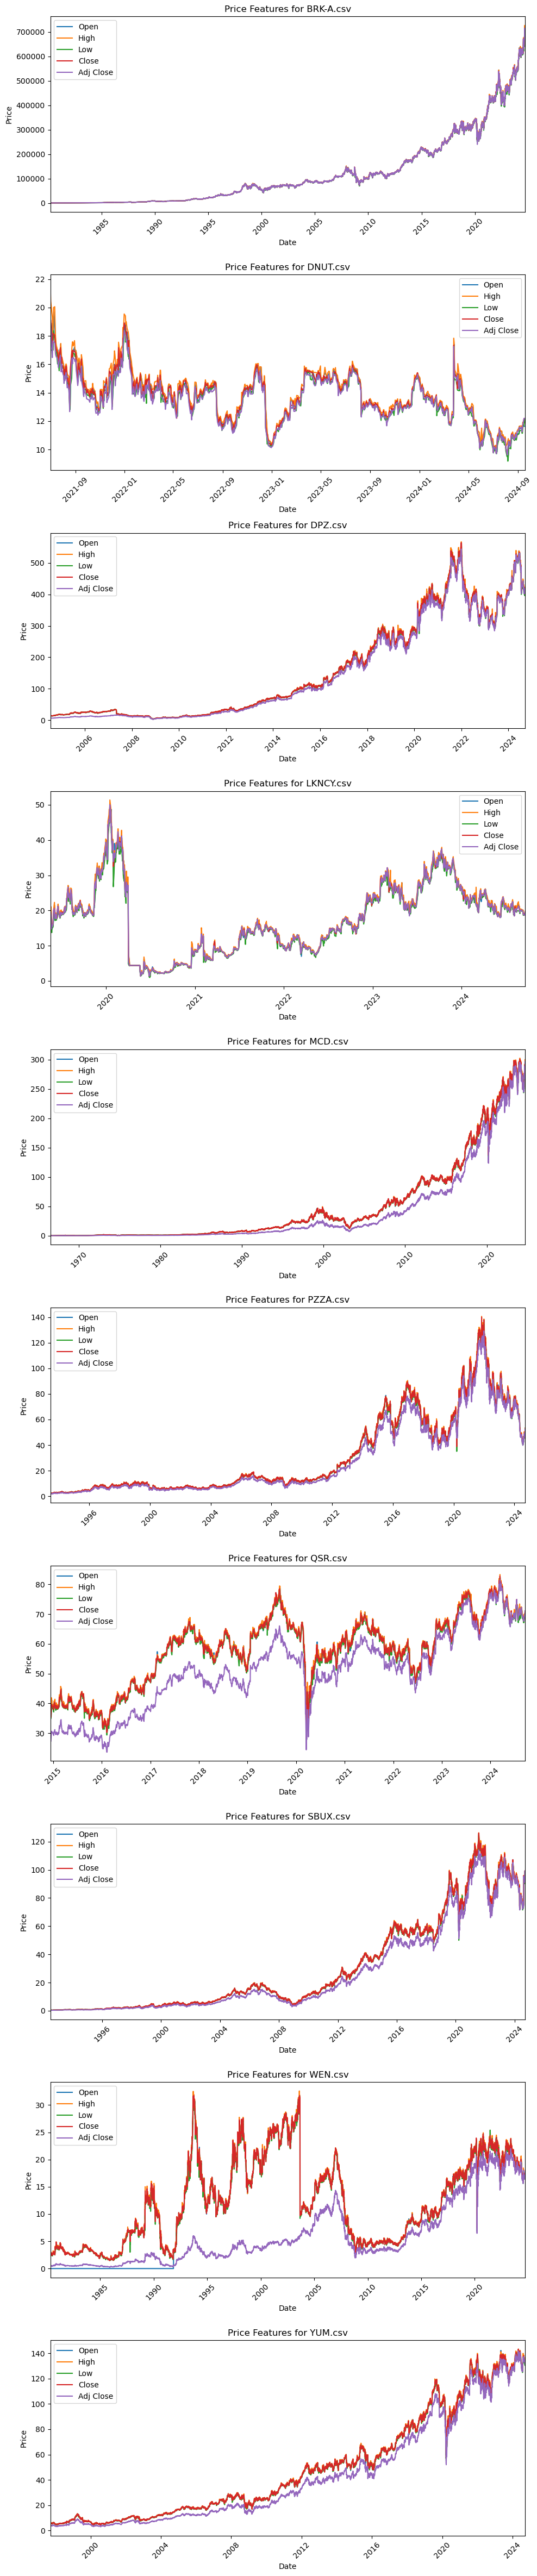

In [34]:
plot_all_datasets_vertically(dataframes, variables)

In [35]:
# Print the first dataframe in the dictionary
first_file_name = list(dataframes.keys())[0]  # Get the first key (file name) in the dictionary
first_df = dataframes[first_file_name]       # Get the corresponding dataframe
pd.set_option('display.max_rows', None)
display(first_df.tail(100))  # Display the first_df.head(100)

,Date,Open,High,Low,Close,Adj Close,Volume
11122,2024-04-29,606000.00,611041.0,604669.0,605500.0,605500.0,16500.0
11123,2024-04-30,607189.00,607189.0,599500.0,599500.0,599500.0,12900.0
11124,2024-05-01,596421.00,607055.0,596421.0,602100.0,602100.0,13500.0
11125,2024-05-02,609950.00,609950.0,600586.0,606413.0,606413.0,12400.0
11126,2024-05-03,612883.00,616000.0,602415.0,603000.0,603000.0,14000.0
11127,2024-05-06,609364.00,614580.0,601500.0,608795.0,608795.0,18000.0
11128,2024-05-07,612000.00,613160.0,607850.0,611258.0,611258.0,13000.0
11129,2024-05-08,611543.00,613000.0,608035.0,612100.0,612100.0,13200.0
11130,2024-05-09,611970.00,615835.0,609606.0,615835.0,615835.0,12600.0
11131,2024-05-10,620000.00,622000.0,614495.5,622000.0,622000.0,14100.0


With these last plots, we realize that the outlier removal was crucial to begin with the project.

# Exercises
---
### 1: For each dataset:

 • Print the number of rows and columns
 
 • Display the column names and their data types


Since we cleaned the data before, we are gonna work on the dictionary created which has dataframes. The Date column change from object to datetime.

In [36]:
# Iterate through the dataframes in the dictionary
for file_name, df in dataframes.items():
    print(f"Information for the file '{file_name}'")   # Name, for ease of reading
    print(f"Total rows: {df.shape[0]}")                # Number of rows
    print(f"Total columns: {df.shape[1]}")             # Number of columns
    print(df.dtypes)                                   # Data types of the columns
    print("----------------------------------")        # Small break, to make it less convoluted


Information for the file 'BRK-A.csv'
Total rows: 11227
Total columns: 7
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object
----------------------------------
Information for the file 'DNUT.csv'
Total rows: 815
Total columns: 7
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object
----------------------------------
Information for the file 'DPZ.csv'
Total rows: 5088
Total columns: 7
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object
----------------------------------
Information for the file 'LKNCY.csv'
Total rows: 1350
T

### 2: Extract all rows where the date is in the year 2023. Print the number of rows and visualize the Close price trend for this period

File: BRK-A.csv
Number of rows in 2023: 250


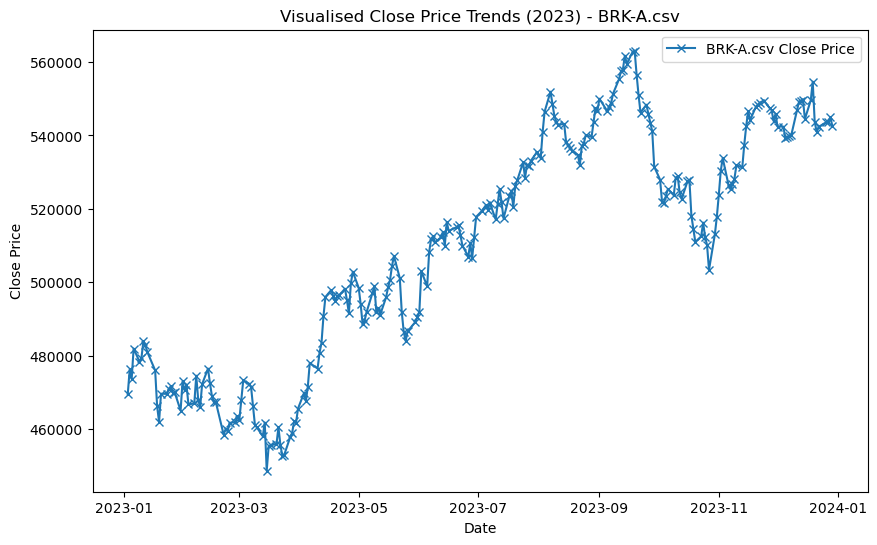

File: DNUT.csv
Number of rows in 2023: 252


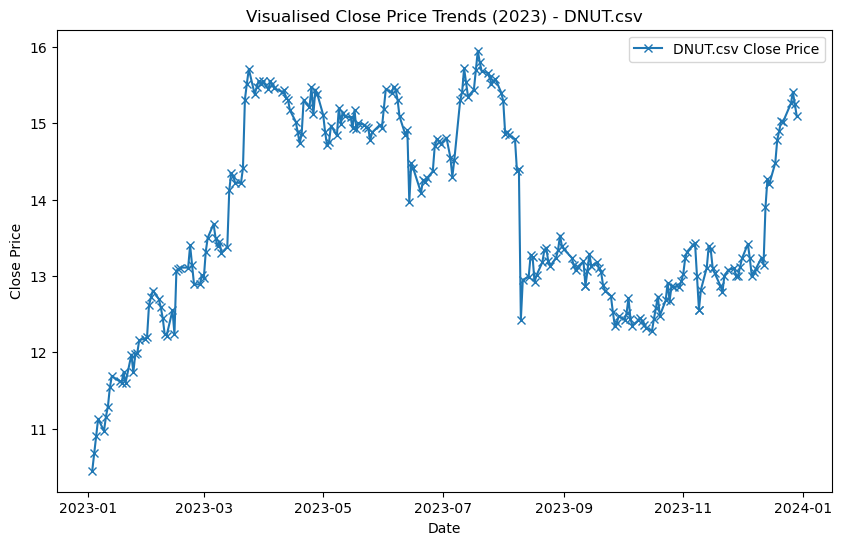

File: DPZ.csv
Number of rows in 2023: 250


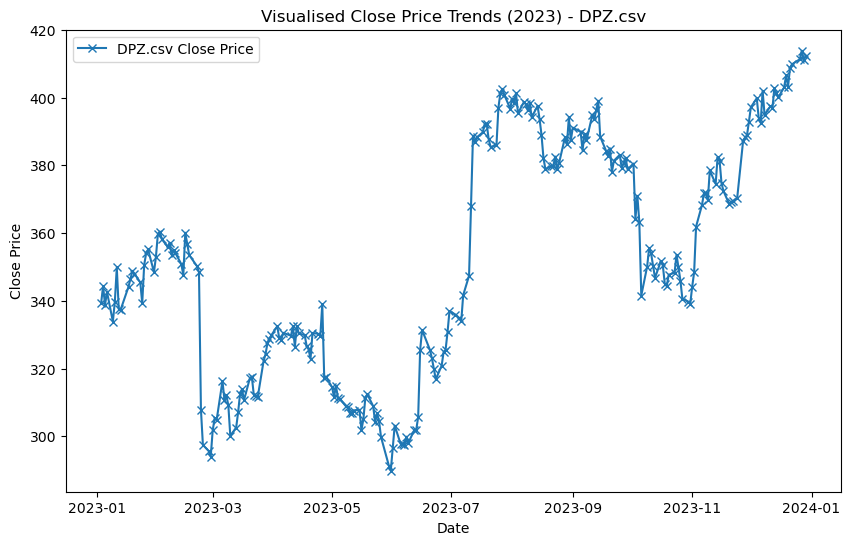

File: LKNCY.csv
Number of rows in 2023: 251


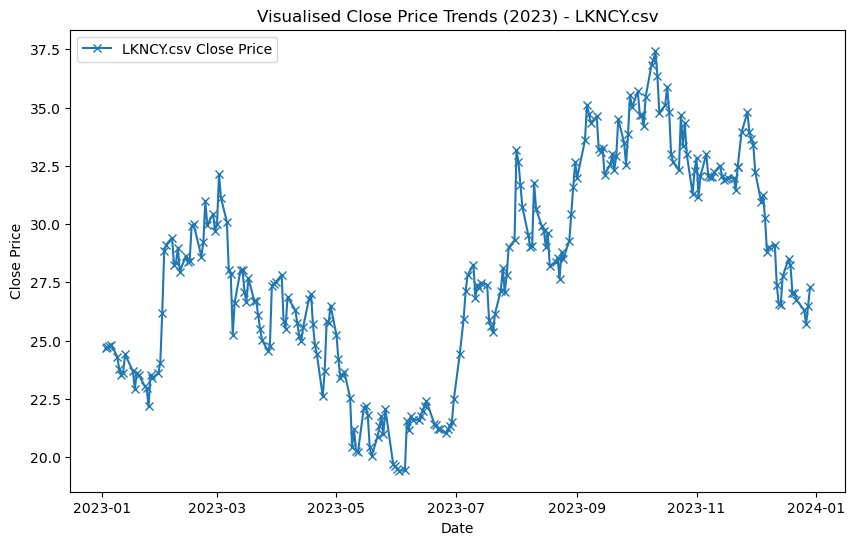

File: MCD.csv
Number of rows in 2023: 250


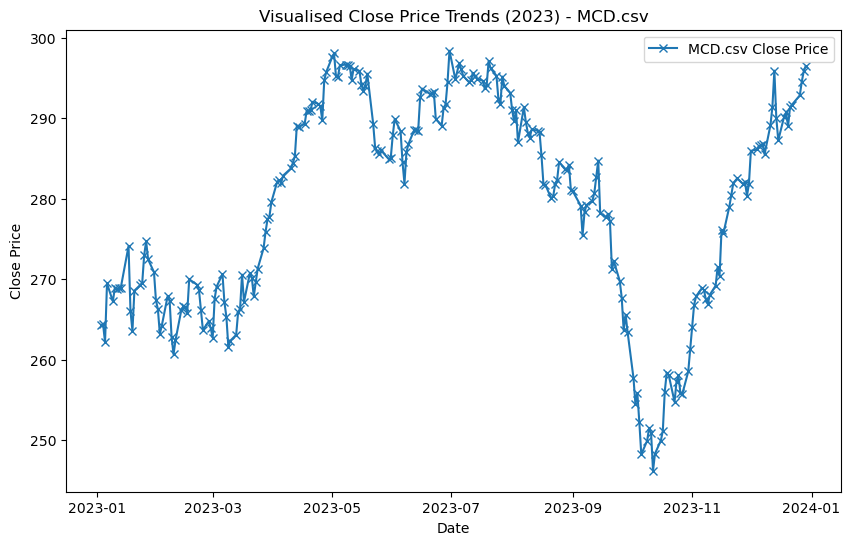

File: PZZA.csv
Number of rows in 2023: 250


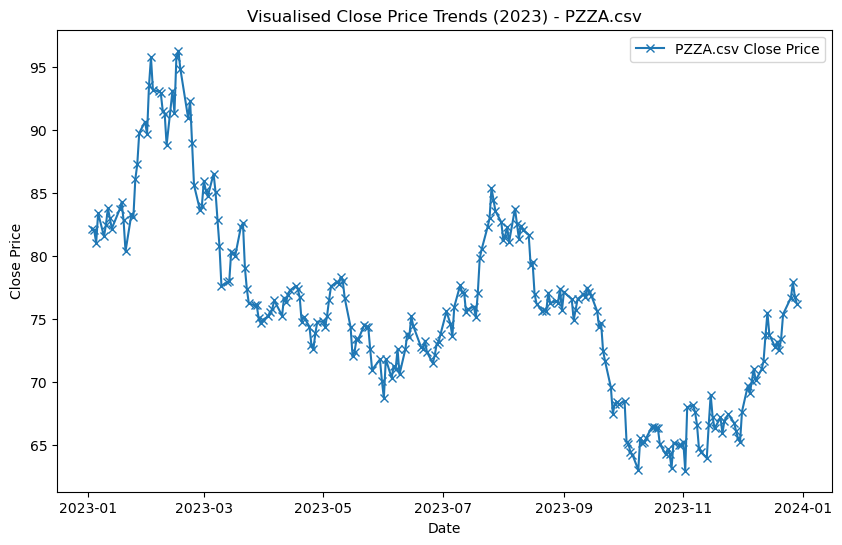

File: QSR.csv
Number of rows in 2023: 250


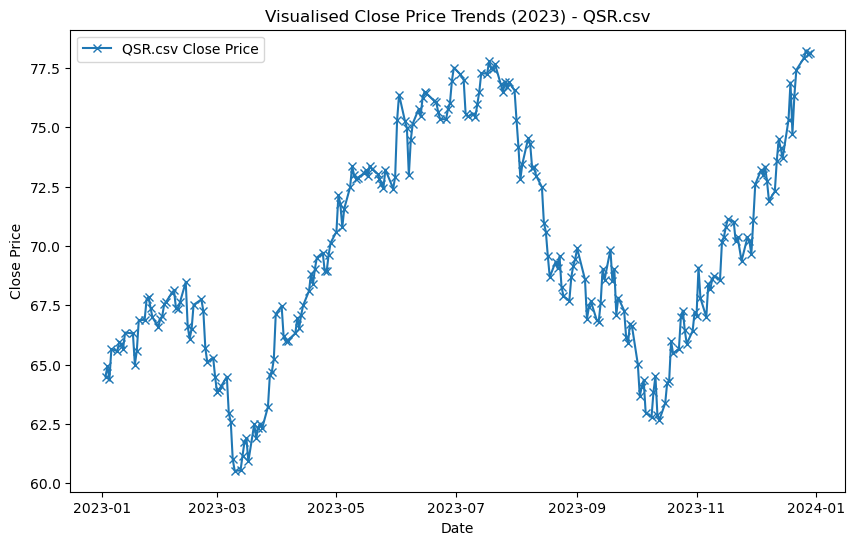

File: SBUX.csv
Number of rows in 2023: 250


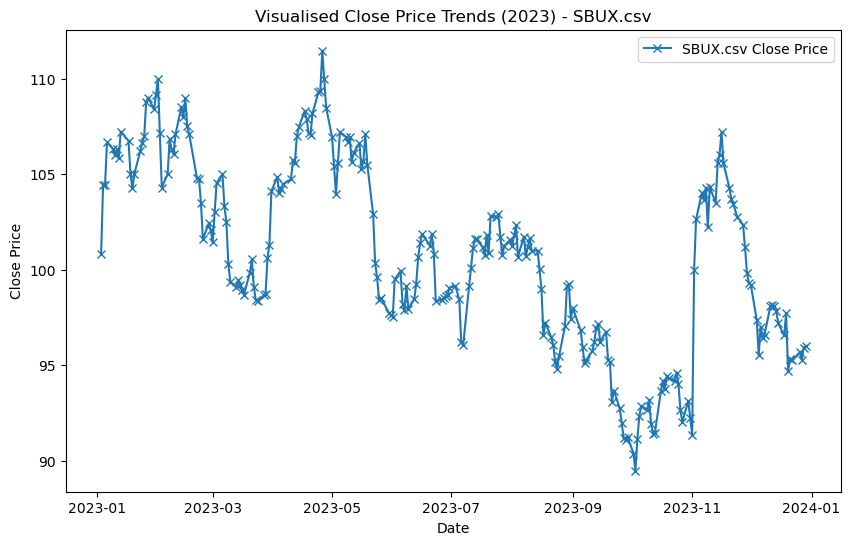

File: WEN.csv
Number of rows in 2023: 251


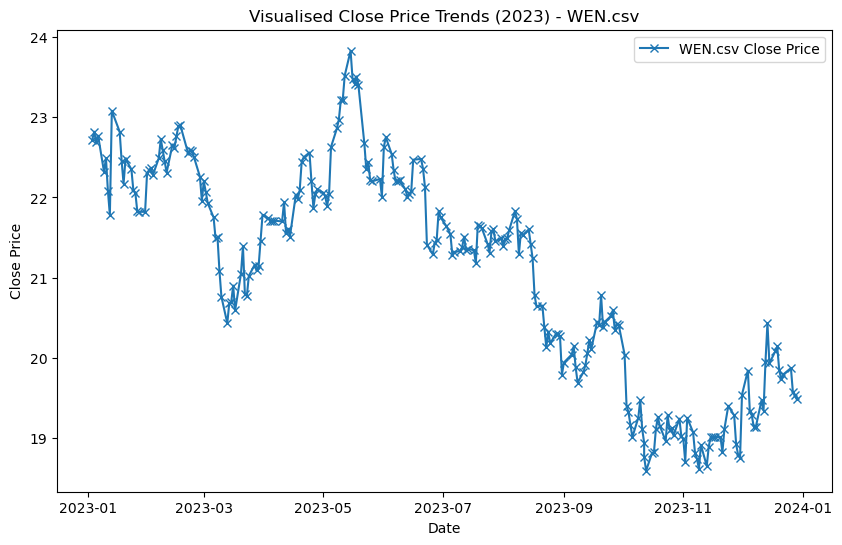

File: YUM.csv
Number of rows in 2023: 250


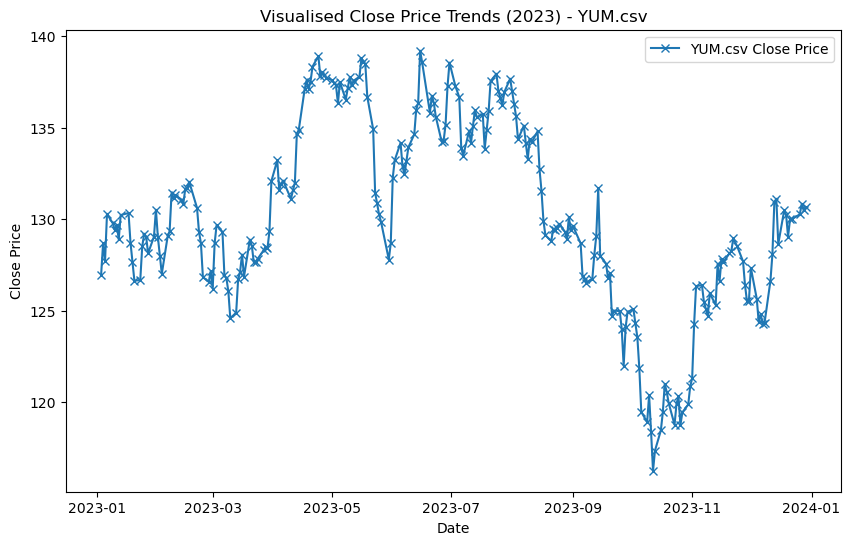

In [37]:
for file_name, df in dataframes.items():
    df['Date'] = pd.to_datetime(df['Date'])
    year_2023 = df[df['Date'].dt.year == 2023]

    print(f"File: {file_name}")
    print(f"Number of rows in 2023: {year_2023.shape[0]}")  # Print the number of rows in 2023
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(year_2023['Date'], year_2023['Close'], label=f'{file_name} Close Price', marker='x')
    plt.title(f'Visualised Close Price Trends (2023) - {file_name}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.legend()
    plt.show()



In [ ]:
#### REVISE NICO THE NEW GRAPHS AND THE OLD ONES

for file in os.listdir(datasets):
    df = pd.read_csv(os.path.join(datasets, file))      # Same code to cycle through the files, as before

    df['Date'] = pd.to_datetime(df['Date'])
    year_2023 = df[df['Date'].dt.year == 2023]

    print(f"File: {file}")
    plt.figure(figsize=(10, 6))
    plt.plot(year_2023['Date'], year_2023['Close'], label=f'{file} Close Price', marker='x')
    plt.title(f'Visualised Close Price Trends (2023) - {file}')
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.show()


### 3: For each company, find the day with the highest Close price and display it alongside the price.

Since there might be more than one day with the highest price, we decide to only take the last one.

In [38]:
for file_name, df in dataframes.items():

    # Find the maximum Close price
    max_close_price = df["Close"].max()

    # Extract the name from the file name
    pattern = r"^(.*)(?=\.csv$)"
    match = re.match(pattern, file_name)
    if match:
        name = match.group()
        print(f'Max close price for {name}: {max_close_price}')

    # Display the last day with the highest Close price
    max_close_date = df[df["Close"] == max_close_price].iloc[-1]
    print(f"Date: {max_close_date['Date'].strftime('%Y-%m-%d')}, Close Price: {max_close_date['Close']}")
    print("-"*10)


Max close price for BRK-A: 715910.0
Date: 2024-09-03, Close Price: 715910.0
----------
Max close price for DNUT: 19.12
Date: 2021-07-02, Close Price: 19.12
----------
Max close price for DPZ: 564.33
Date: 2021-12-31, Close Price: 564.33
----------
Max close price for LKNCY: 50.02
Date: 2020-01-17, Close Price: 50.02
----------
Max close price for MCD: 300.53
Date: 2024-01-19, Close Price: 300.53
----------
Max close price for PZZA: 140.01
Date: 2021-11-04, Close Price: 140.01
----------
Max close price for QSR: 82.75
Date: 2024-03-13, Close Price: 82.75
----------
Max close price for SBUX: 126.06
Date: 2021-07-26, Close Price: 126.06
----------
Max close price for WEN: 31.75
Date: 1993-09-30, Close Price: 31.75
----------
Max close price for YUM: 143.19
Date: 2024-04-29, Close Price: 143.19
----------


In [39]:
for file in os.listdir(datasets):   # Loop through the files
    df = pd.read_csv(os.path.join(datasets, file)) 

    print(f"File: {file}")

    # Find the maximum Close price
    max_close_price = df["Close"].max()

    pattern = r"^(.*)(?=\.csv$)"
    match = re.match(pattern, file)
    if match:
        name = match.group()
        print(f'Max close price for {name}: {max_close_price}')

    # Display days with highest Close price 
    df = df[["Date","Close"]][df["Close"] == max_close_price]
    print(df)
    print("\n") 

File: BRK-A.csv
Max close price for BRK-A: 1198073.648978061
             Date         Close
0      1980-03-17  1.198074e+06
7      1980-03-26  1.198074e+06
94     1980-07-30  1.198074e+06
95     1980-07-31  1.198074e+06
134    1980-09-25  1.198074e+06
184    1980-12-08  1.198074e+06
185    1980-12-09  1.198074e+06
231    1981-02-13  1.198074e+06
275    1981-04-20  1.198074e+06
307    1981-06-04  1.198074e+06
309    1981-06-08  1.198074e+06
354    1981-08-11  1.198074e+06
403    1981-10-20  1.198074e+06
412    1981-11-02  1.198074e+06
416    1981-11-06  1.198074e+06
437    1981-12-08  1.198074e+06
469    1982-01-25  1.198074e+06
530    1982-04-22  1.198074e+06
548    1982-05-18  1.198074e+06
556    1982-05-28  1.198074e+06
579    1982-07-01  1.198074e+06
595    1982-07-26  1.198074e+06
766    1983-03-28  1.198074e+06
802    1983-05-18  1.198074e+06
832    1983-06-30  1.198074e+06
845    1983-07-20  1.198074e+06
916    1983-10-28  1.198074e+06
939    1983-12-01  1.198074e+06
959    1983

### 4: Group the data by month and calculate the average Close price for each company. Plot these monthly averages for 3 companies and compare them. Justify the chart selection.

In [5]:
i = 0 # Counter
monthly_averages = []   # Initialize an empty list to store monthly averages for plotting
labels = []  # List to store company names

for file in os.listdir(datasets):                       # We loop through the files
    df = pd.read_csv(os.path.join(datasets, file)) 
    
    pattern = r"^(.*)(?=\.csv$)"
    match = re.match(pattern, file)
    if match:
        name = match.group()
        print(f'{name} Average Close Price')

    # Convert date to datetime object
    df['Date'] = pd.to_datetime(df['Date'])

    # Set date as index to perform time series operations
    df.set_index('Date', inplace=True)

    # Resampling the time series data based on months
    # Apply on stock close price  
    # 'ME' standards for month end
    monthly_avg = df.Close.resample('ME').mean()
    print(monthly_avg)
    print("\n") 

    # Counter to store first three monthly average datasets for plotting
    if i < 3:
        i += 1
        monthly_averages.append(monthly_avg)
        labels.append(name)
    else: 
        break

SBUX Average Close Price
Date
1992-06-30     0.347656
1992-07-31    14.848883
1992-08-31    15.572675
1992-09-30    14.913801
1992-10-31     0.471114
                ...    
2024-05-31    76.413334
2024-06-30    80.321053
2024-07-31    85.743082
2024-08-31    87.036667
2024-09-30    95.045384
Freq: ME, Name: Close, Length: 388, dtype: float64


DPZ Average Close Price
Date
2004-07-31     13.534286
2004-08-31     13.744500
2004-09-30     14.728095
2004-10-31     15.777500
2004-11-30     17.362000
                 ...    
2024-05-31    512.880909
2024-06-30    523.253883
2024-07-31    505.652116
2024-08-31    480.494483
2024-09-30    409.414162
Freq: ME, Name: Close, Length: 243, dtype: float64


MCD Average Close Price
Date
1966-07-31      0.259562
1966-08-31     25.604511
1966-09-30      0.185234
1966-10-31      0.170576
1966-11-30     53.611403
                 ...    
2024-05-31    266.246817
2024-06-30    256.508887
2024-07-31    254.738499
2024-08-31    278.598567
2024-09-30    291

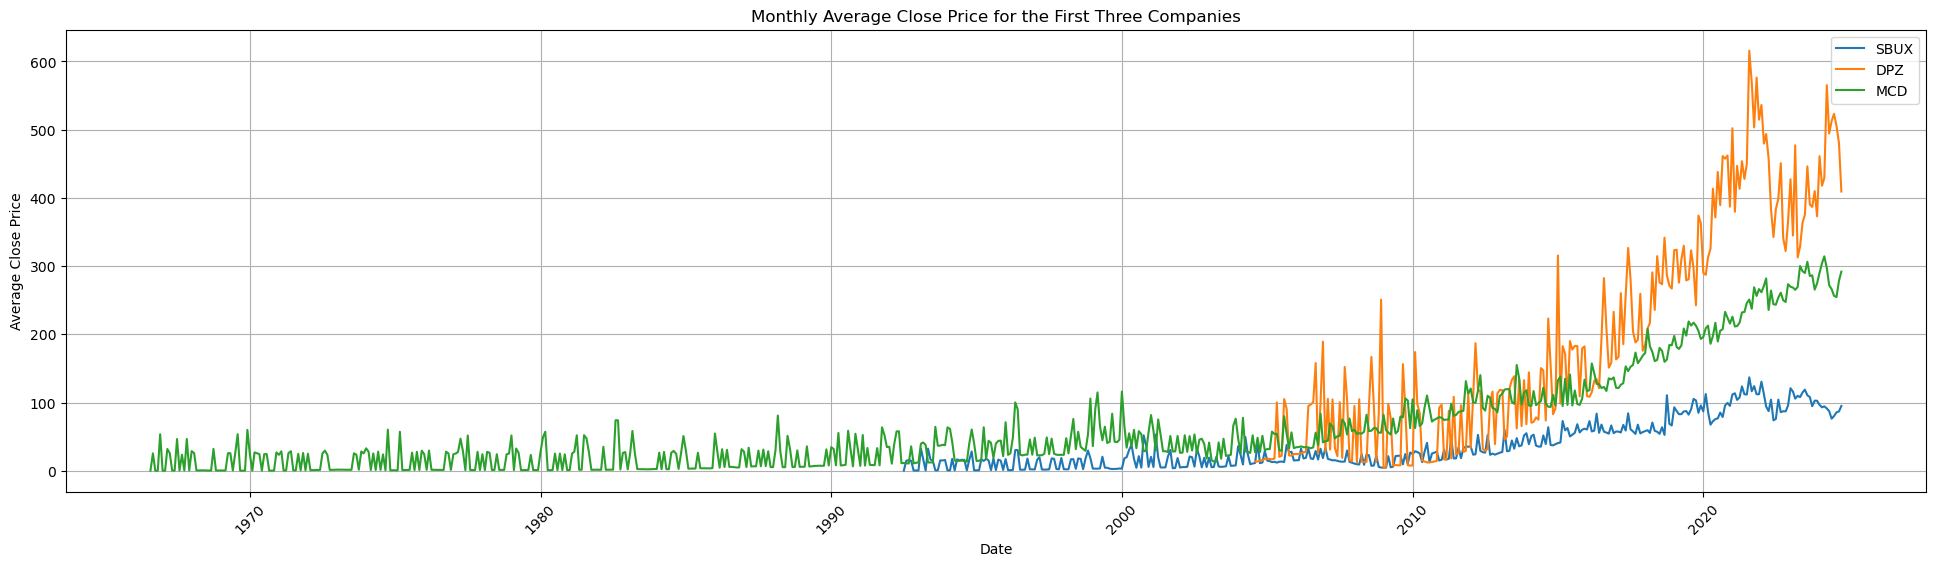

In [6]:
plt.figure(figsize=(24, 6))

# iterate through list to plot each company's monthly average
for i, monthly_avg in enumerate(monthly_averages):
    plt.plot(monthly_avg.index, monthly_avg, label=labels[i])

plt.xlabel('Date')
plt.ylabel('Average Close Price')
plt.title('Monthly Average Close Price for the First Three Companies')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()